˚　　　　✦　☀️　　.　　. 🪐　☄️˚　.　　　👨‍🚀 🌑　.　　　　　 ✦　　　.　　˚　🌒 　. ✦ ✨　  ✦
 　　.  　 🌌 　　˚　　　　　*　　 　　✦　　　.　　.　　✦　　˚ 　🛰️　 　　˚　.　*　　. 　˚　　.
               . ✦ ✨　  ✦  🚀  WELCOME TO OUR RESEARCH PAPER 🛸 ˚　. ✦ ✨　  ✦
˚　　🛰️　✦　　　.　　. 🪐　 ˚　.　　　🌠 　.　　💫　　 ✦　　　.　　˚　🌕🐇　. 🌍 (ง'̀-'́)ง　👽  
 　　.  🌙 　　　˚ 　👨‍🚀　　*　　.　　　🔭　　˚ 　 ✦　　　　 ⭑⋆｡˚　　˚👾　　　 　　˚　.　*　　. 

In [17]:
from PIL import Image
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA

def createFileList(myDir, format='.jpg'):
    fileList = []
    labels = []
    names = []
    keywords = {"K": "1", "U": "0"}  
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
                # Extract labels from file names
                label = name  
                for keyword, value in keywords.items():
                    if keyword in name:
                        label = name
                        break
                labels.append(label)
                names.append(name)
    return fileList, labels, names

myFileList, labels, names = createFileList(r'C:\VS_code\Astroquest\Astro photos (Small)')

# Define the desired image size
target_width = 100
target_height = 100


compressed_data = []

for i, file in enumerate(myFileList):
    img_file = Image.open(file)
   
    img_resized = img_file.resize((target_width, target_height))
   
    img_array = np.asarray(img_resized, dtype=int)
    
    if img_array.shape != (target_height, target_width, 3):  
        print(f"Skipping image {file} due to incorrect dimensions: {img_array.shape}")
        continue
    
    flat_img_array = img_array.flatten()
    
    flat_img_array = np.append(flat_img_array, labels[i])
  
    compressed_data.append(flat_img_array)


compressed_data = np.array(compressed_data)


X = compressed_data[:, :-1]
y = compressed_data[:, -1]


n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=[f"PC_{i}" for i in range(n_components)])
df['label'] = y

output_file = "output.csv"
df.to_csv(output_file, index=False)

print("CSV file created successfully at:", output_file)

Skipping image C:\VS_code\Astroquest\Astro photos (Small)\Star-Algieba (Small).jpg due to incorrect dimensions: (100, 100)
Skipping image C:\VS_code\Astroquest\Astro photos (Small)\Star-Altair(Small).jpg due to incorrect dimensions: (100, 100)
CSV file created successfully at: output.csv


(array([1., 2., 4., 3., 2., 8., 0., 2., 1., 1.]),
 array([-2708.32529354, -2119.18057417, -1530.0358548 ,  -940.89113544,
         -351.74641607,   237.3983033 ,   826.54302267,  1415.68774203,
         2004.8324614 ,  2593.97718077,  3183.12190014]),
 <BarContainer object of 10 artists>)

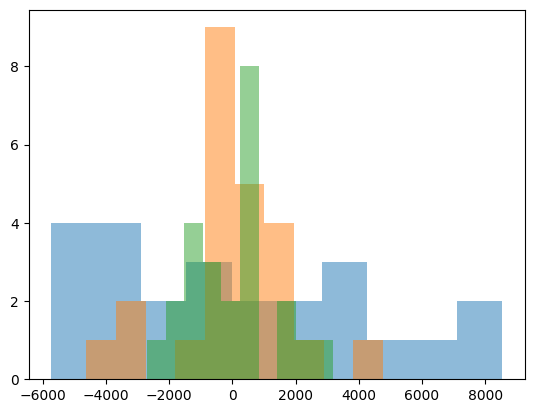

In [18]:
import matplotlib.pyplot  as plt

dataset = pd.read_csv('output.csv')
plt.hist(dataset['PC_0'], alpha=0.5)
plt.hist(dataset['PC_1'], alpha=0.5)
plt.hist(dataset['PC_2'], alpha=0.5)



In [54]:

import os
import cv2
import numpy as np

def add_gaussian_noise(image, mean=1, std=40):
    """Add Gaussian noise to an image."""
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

# Path to the folder containing images
folder_path = 'C:/VS_code/Astroquest/Astro photos (Small)'

# List all files in the folder and filter out non-image files
image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Number of copies to create for each image
num_copies = 10

# Output folder to save noisy images
output_folder = 'C:/VS_code/Astroquest/noisy_images'
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image file
for file_name in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, file_name)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error loading image: {image_path}")
        continue
    
    # Generate noisy copies
    for i in range(num_copies):
        # Add Gaussian noise
        noisy_image = add_gaussian_noise(image)
        output_file_name = f'noisy_{file_name.split(".")[0]}_{i+1}.jpg'
        output_file_path = os.path.join(output_folder, output_file_name)
        cv2.imwrite(output_file_path, noisy_image)
        print(f"Saved: {output_file_path}")


In [20]:
def createFileList(myDir, format='.jpg'):
    fileList = []
    labels = []
    names = []
    keywords = {"K": "1", "U": "0"}  
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
                # Extract labels from file names
                label = name  
                for keyword, value in keywords.items():
                    if keyword in name:
                        label = name
                        break
                labels.append(label)
                names.append(name)
    return fileList, labels, names

myFileList, labels, names = createFileList(r'C:/VS_code/Astroquest/noisy_images')

# Define the desired image size
target_width = 100
target_height = 100


compressed_data = []

for i, file in enumerate(myFileList):
    img_file = Image.open(file)
   
    img_resized = img_file.resize((target_width, target_height))
   
    img_array = np.asarray(img_resized, dtype=int)
    
    if img_array.shape != (target_height, target_width, 3):  
        print(f"Skipping image {file} due to incorrect dimensions: {img_array.shape}")
        continue
    
    flat_img_array = img_array.flatten()
    
    flat_img_array = np.append(flat_img_array, labels[i])
  
    compressed_data.append(flat_img_array)


compressed_data = np.array(compressed_data)


X = compressed_data[:, :-1]
y = compressed_data[:, -1]


n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=[f"PC_{i}" for i in range(n_components)])
df['label'] = y

output_file = "noisy_images.csv"
df.to_csv(output_file, index=False)

print("CSV file created successfully at:", output_file)

CSV file created successfully at: noisy_images.csv


(array([20., 20., 10., 10., 90., 30., 30., 40., 10., 10.]),
 array([-2860.29115785, -2287.4457492 , -1714.60034055, -1141.75493189,
         -568.90952324,     3.93588541,   576.78129406,  1149.62670272,
         1722.47211137,  2295.31752002,  2868.16292868]),
 <BarContainer object of 10 artists>)

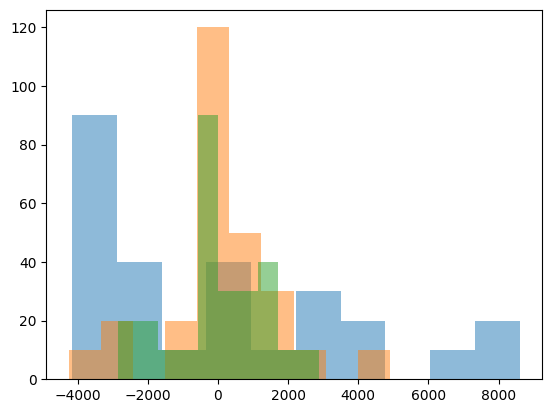

In [21]:
import matplotlib.pyplot  as plt

dataset = pd.read_csv('noisy_images.csv')
plt.hist(dataset['PC_0'], alpha=0.5)
plt.hist(dataset['PC_1'], alpha=0.5)
plt.hist(dataset['PC_2'], alpha=0.5)

In [6]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

def extract_grain_level(filename):
    # Assuming the filename format is something like "image_grain_<grain_level>.jpg"
    parts = filename.split('_')
    grain_level_str = parts[-1].split('.')[0]  # Extract the grain level part
    grain_level = int(grain_level_str)  # Convert the grain level string to an integer
    return grain_level

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize pixel values
    return img

# Load images and their corresponding grain levels
image_paths = []  # List to store image paths
grain_levels = []  # List to store corresponding grain levels

folder_path = 'C:/VS_code/Astroquest/noisy_images'
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    image_paths.append(image_path)
    # Extract grain level from filename or metadata
    grain_level = extract_grain_level(filename)
    grain_levels.append(grain_level)

# Convert lists to numpy arrays
image_paths = np.array(image_paths)
grain_levels = np.array(grain_levels)

# Split data into training and validation sets
train_image_paths, val_image_paths, train_grain_levels, val_grain_levels = \
    train_test_split(image_paths, grain_levels, test_size=0.2, random_state=42)

# Load and preprocess images
train_images = np.array([load_and_preprocess_image(path) for path in train_image_paths])
val_images = np.array([load_and_preprocess_image(path) for path in val_image_paths])

# Define CNN regression model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_images, train_grain_levels, epochs=10, validation_data=(val_images, val_grain_levels))

# Predict grain levels for all images
all_images = np.array([load_and_preprocess_image(path) for path in image_paths])
predicted_grain_levels = model.predict(all_images)

# Sort images based on predicted grain levels
sorted_indices = np.argsort(predicted_grain_levels)

# Now, sorted_indices contains the indices of images sorted from lowest to highest predicted grain levels


Epoch 1/10


c:\Users\tejas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - loss: 35.7455 - val_loss: 10.2272
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 13.6515 - val_loss: 9.6371
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 11.6272 - val_loss: 7.7763
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 8.9670 - val_loss: 9.6754
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 8.8773 - val_loss: 7.6421
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 8.6926 - val_loss: 7.5763
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - loss: 9.3659 - val_loss: 8.1620
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 9.6773 - val_loss: 8.1374
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 8.1366 - val_loss: 7.9408
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 8.4606 - val_loss: 7.8088
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [42]:
import os
import random
import shutil

# Path to the folder containing images
folder_path = 'C:/VS_code/Astroquest/noisy_images'

# List all files in the folder
image_files = os.listdir(folder_path)

# Shuffle the list of image files
random.shuffle(image_files)

# Create a new folder to store shuffled images
shuffled_folder_path = 'C:/VS_code/Astroquest/noisy_shuffled_folder'
os.makedirs(shuffled_folder_path, exist_ok=True)

# Move or copy shuffled images to the new folder
for i, filename in enumerate(image_files):
    source_path = os.path.join(folder_path, filename)
    destination_path = os.path.join(shuffled_folder_path, f'image_{i + 1}.jpg')  # Rename images with a new index
    shutil.copyfile(source_path, destination_path)  # Use shutil.move() if you want to move instead of copy

In [34]:
import os
import shutil
import cv2
from skimage.metrics import structural_similarity as ssim

# Path to the folder containing images
folder_path = 'C:/VS_code/Astroquest/noisy_shuffled_folder'

# Function to calculate SSIM between two images
def calculate_ssim(image1, image2):
    img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    score, _ = ssim(img1, img2, full=True)
    return score

# List all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Read and resize images
images = []
for image_path in image_files:
    image = cv2.imread(image_path)
    # Resize each image to a consistent size (e.g., 224x224)
    resized_image = cv2.resize(image, (224, 224))
    images.append(resized_image)

# Calculate SSIM between each pair of resized images
image_ssim_scores = {}
for i, image1 in enumerate(images):
    for j, image2 in enumerate(images):
        if i != j:
            ssim_score = calculate_ssim(image1, image2)
            image_ssim_scores[(i, j)] = ssim_score

# Sort images based on their average SSIM scores
average_ssim_scores = {}
for i in range(len(images)):
    avg_ssim_score = sum(image_ssim_scores[(i, j)] for j in range(len(images)) if i != j) / (len(images) - 1)
    average_ssim_scores[i] = avg_ssim_score

sorted_images_indices = sorted(average_ssim_scores, key=average_ssim_scores.get, reverse=True)

# Create a new folder to store sorted images
sorted_folder_path = 'C:/VS_code/Astroquest/sdorted folder'
os.makedirs(sorted_folder_path, exist_ok=True)

# Move or copy sorted images to the new folder
for i, idx in enumerate(sorted_images_indices):
    source_path = image_files[idx]
    destination_path = os.path.join(sorted_folder_path, f'image_{i + 1}.jpg')
    shutil.copyfile(source_path, destination_path)  # Use shutil.move() if you want to move instead of copy
    
